In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [3]:
film = pd.read_csv('.\data\details\\35360684.csv')
film

,seen,username,id,time,location,votes,star,comment
0,1,十殿阎罗V,174923003,2022-08-19 13:47:18,NaN,1998,10.0,1：没有女性角色不用硬编，不必做出雌性哮天犬这种角色。2：为什么从头到尾不用任何中国乐器？你...
1,1,成精的粽子,127457297,2022-08-19 12:16:51,NaN,746,10.0,尬出天际，一星不能再多了！炫目的特效，乱糟糟的故事，只看到导演的急功近利，坚持看完是我给予国...
2,1,核仁烤排骨,174086186,2022-08-19 15:04:49,江苏,14118,30.0,不懂为什么要把啸天犬性转，看一个小女孩在地上爬来爬去还舔杨戬一个成年男子这种设定除了让人感觉...
3,1,皮格马利翁,173582606,2022-08-19 12:39:07,NaN,11542,30.0,沉香：《二舅治好了我的精神内耗》
4,1,你男神是我男友,159087326,2022-08-19 20:55:41,江苏,614,10.0,哮天犬幻化成女性没什么问题，但为什么要让小姑娘四脚朝地爬，做狗的动作，还在杨戬身边蹭来舔去
...,...,...,...,...,...,...,...,...
395,0,卡卡啦啊啊,174091072,2021-09-10 09:33:25,NaN,0,NaN,我想看你们公司把这个系列做成，现代世界封神大集合，妖魔神鬼佛
396,0,毕嘉嗦螺丝粉,203865909,2022-08-18 13:14:13,NaN,0,NaN,封神宇宙，画面🉐️，杨戬帅
397,0,照照,201399564,2022-11-07 22:36:48,广东,0,NaN,杨戬超级超级超级超级帅
398,0,PIG KEEPER,240182786,2022-08-20 15:51:53,浙江,0,NaN,太穷啦，等着看盗版，他们说特效很好啊


# 35360684新神榜：杨戬
High Popularity and Medium Scores
## Audience

### Time
8月上映，热度最高。

<AxesSubplot:ylabel='Count'>

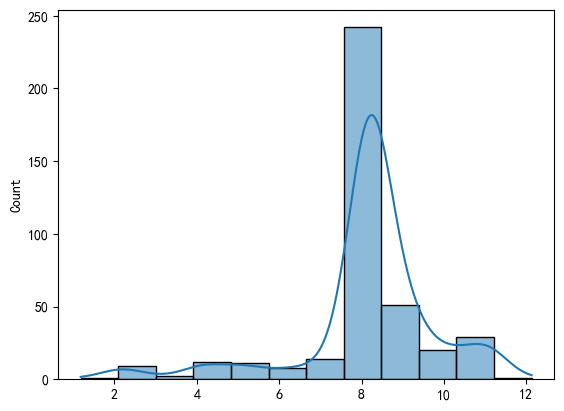

In [33]:
mon = film['time']
month_f = []
for i in range(0, len(mon), 1):
    month_f.append(float(mon[i][5:10].replace('-', '.')))

#  不同月份的电影数量分布直方图
sns.histplot(month_f, kde=True, bins=12)

### Location

In [158]:
loc = []
for i, region in enumerate(film["location"]):
    #  delete nan
    if region==region:
        loc.append(region)
loc = Counter(loc)

loc_o = loc.most_common()
loc = {}
for i in range(len(loc_o)//2):
    loc[loc_o[i][0]] = int(loc_o[i][1])
    loc[loc_o[-1-i][0]] = int(loc_o[-1-i][1])

(-1.1007034663239086,
 1.1000334983963767,
 -1.1009919051872237,
 1.1080013874118424)

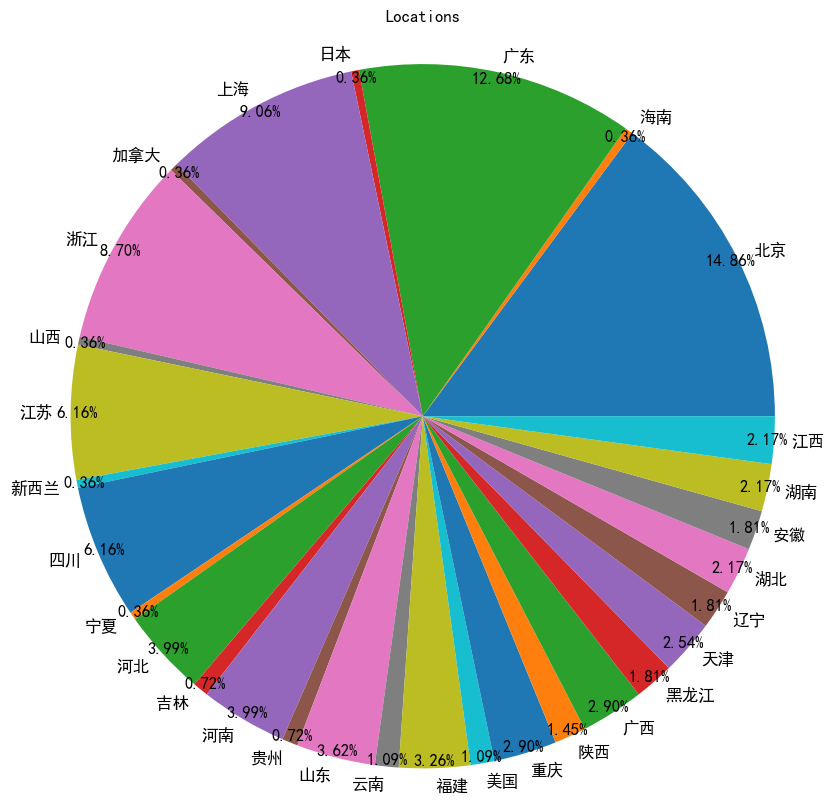

In [170]:
plt.rcParams['font.sans-serif']=['SimHei'] # 正常显示中文
plt.figure(figsize = (10,10))  # 设置画布大小 
explode = (0.1, 0, 0.9, 0.4, 0.9, 0.4, 0.9, 0.4, 0.6, 0.6,
           0.7, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.4, 0.3, 0.3, 
           0.7, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.4, 0.3, 0.3,)  # 设置每一块分割出的间隙大小
plt.pie(x=loc.values(), labels=loc.keys(), autopct = '%1.2f%%',
        textprops={'fontsize': 12}, pctdistance = 0.98, labeldistance = 1.05)
plt.title("Locations")  # 设置标题
# plt.legend()
plt.axis('equal')

### Comments

<AxesSubplot:xlabel='star', ylabel='votes'>

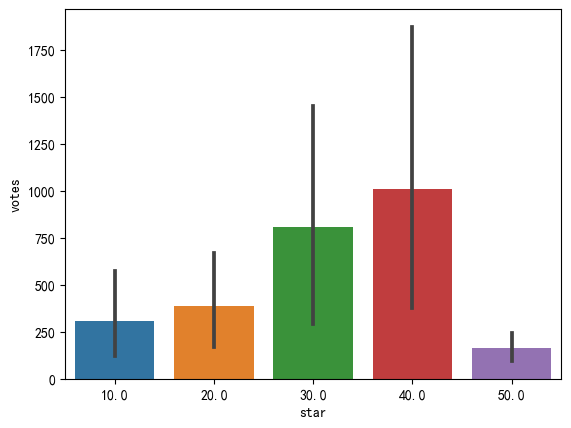

In [31]:
sns.barplot(x=film["star"], y=film["votes"])

In [146]:
stars = []
for i, star in enumerate(film["star"]):
    #  delete nan
    if star==star:
        stars.append(star)
stars = Counter(stars)

Counter({10.0: 16, 30.0: 62, 40.0: 42, 50.0: 35, 20.0: 43})

(-1.1000000110187067,
 1.1000000005247004,
 -1.1182996973864636,
 1.1112568299771344)

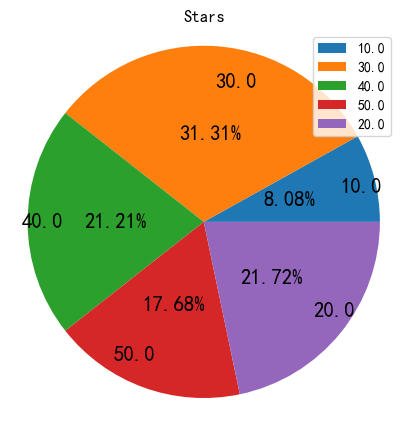

In [171]:
plt.rcParams['font.sans-serif']=['SimHei'] # 正常显示中文
plt.figure(figsize = (5, 5))  # 设置画布大小 
plt.pie(x=stars.values(), labels=stars.keys(), autopct = '%1.2f%%',
        textprops={'fontsize': 15}, pctdistance = 0.5, labeldistance = 0.8)
plt.title("Stars")  # 设置标题
plt.legend()
plt.axis('equal')

In [150]:
att = {"positive" : 0, "negative": 0, "medium":0}
for i, star in enumerate(film["star"]):
    #  delete nan
    if star==star:
        if star > 30:
            att["positive"] += 1
        elif star < 30:
            att["negative"] += 1
        else:
            att["medium"] += 1

{'positive': 77, 'negative': 59, 'medium': 62}

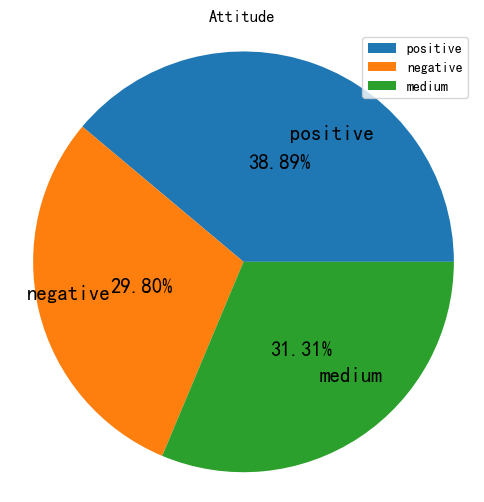

In [172]:
plt.rcParams['font.sans-serif']=['SimHei'] # 正常显示中文
plt.figure(figsize = (6, 6))  # 设置画布大小 
plt.pie(x=att.values(), labels=att.keys(), autopct = '%1.2f%%',
        textprops={'fontsize': 15}, pctdistance = 0.5, labeldistance = 0.65)
plt.title("Attitude")  # 设置标题
plt.axis('equal')
plt.legend()